In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime as dt
import seaborn as sns

In [ ]:
sales_data = pd.read_parquet("sale_data.parquet")
promo_data = pd.read_excel("promo_data.xlsx")

df_sales = pd.DataFrame(sales_data)
df_promo = pd.DataFrame(promo_data)

In [2]:
df_sales

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty
0,2023-01-02,2873114,2879223,2878715,615,38,Kütahya,MERKEZ,430002,24,12
1,2023-01-16,2872993,2879223,2878715,615,38,Kütahya,ALTINTAŞ,430101,7,3
2,2023-01-18,2918671,2879223,2878715,615,38,Afyon,MERKEZ,30002,7,3
3,2023-01-19,2919833,2879223,2878715,615,38,Uşak,MERKEZ,640001,7,3
4,2023-01-02,2873114,2879223,2878715,616,38,Kütahya,MERKEZ,430002,24,12
...,...,...,...,...,...,...,...,...,...,...,...
11422788,2022-12-22,2928593,2927450,2927451,1052,72,Şanlıurfa,SİVEREK,630701,3,0
11422789,2022-12-12,2928640,2927450,2927451,505,45,Şanlıurfa,SİVEREK,1000000,5,0
11422790,2022-12-27,2928662,2927450,2927451,1052,72,Şanlıurfa,AKÇAKALE,630101,5,0
11422791,2022-12-22,2928741,2927450,2927451,1038,64,Şanlıurfa,SİVEREK,1000000,2,0


In [21]:
df_sales.describe()

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,BrickId,PaidQty,FreeQty,PromoRatio
count,9009211,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06,9.009211e+06
mean,2022-11-24 14:57:01.786793472,2.881123e+06,2.880518e+06,2.881863e+06,3.049116e+03,4.416584e+01,3.315863e+05,6.044765e+00,5.334650e-01,2.775466e-02
min,2022-02-01 00:00:00,2.853627e+06,2.879223e+06,2.878715e+06,3.170000e+02,1.400000e+01,1.010100e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,2022-06-29 00:00:00,2.863949e+06,2.879249e+06,2.878789e+06,5.020000e+02,2.000000e+01,1.700020e+05,2.000000e+00,0.000000e+00,0.000000e+00
50%,2022-12-01 00:00:00,2.873490e+06,2.879260e+06,2.878817e+06,5.410000e+02,3.800000e+01,3.416090e+05,4.000000e+00,0.000000e+00,0.000000e+00
75%,2023-04-14 00:00:00,2.888142e+06,2.879266e+06,2.878857e+06,1.038000e+03,6.400000e+01,4.300010e+05,6.000000e+00,0.000000e+00,0.000000e+00
max,2023-09-30 00:00:00,2.931082e+06,2.929489e+06,2.930513e+06,6.960800e+04,1.630000e+02,1.000000e+06,3.906000e+03,1.650000e+03,1.000000e+00
std,NaN,2.276591e+04,6.658115e+03,1.049600e+04,1.060543e+04,3.279235e+01,1.978870e+05,1.195648e+01,4.134231e+00,7.553186e-02


In [19]:
df_sales[["MainDistributorId", "DistributorId"]].drop_duplicates().groupby(["DistributorId"]).size().reset_index(name='counts')["counts"].unique()

array([1], dtype=int64)

In [20]:
df_sales[["MainDistributorId", "DistributorId"]].drop_duplicates().groupby(["MainDistributorId"]).size().reset_index(name='counts')

,MainDistributorId,counts
0,2879223,1
1,2879224,1
2,2879231,1
3,2879236,1
4,2879238,1
5,2879239,1
6,2879244,1
7,2879249,20
8,2879254,1
9,2879257,1


In [21]:
df_sales["ProductId"].unique() # 20

array([ 38,  49,  20,  21,  14,  39,  32,  41,  16,  30, 148,  45, 138,
        64,  72,  29,  76,  15,  25, 163], dtype=int64)

In [23]:
len(df_sales["BrickId"].unique()) # Brick

1002

In [24]:
len(df_sales["PackageId"].unique()) # Nedir bu package id?

84

In [7]:
df_sales["IsPromoted"] = df_sales["FreeQty"]!=0

In [12]:
df_sales["PromoRatio"] = df_sales.FreeQty/(df_sales.PaidQty+df_sales.FreeQty)
df_promo["PromoRatio"] = df_promo.FreeQty/(df_promo.PaidQty+df_promo.FreeQty)

In [13]:
df_sales

,Date,LocationId,MainDistributorId,DistributorId,PackageId,ProductId,City,District,BrickId,PaidQty,FreeQty,IsPromoted,PromoRatio
0,2023-01-02,2873114,2879223,2878715,615,38,Kütahya,MERKEZ,430002,24,12,True,0.333333
1,2023-01-16,2872993,2879223,2878715,615,38,Kütahya,ALTINTAŞ,430101,7,3,True,0.300000
2,2023-01-18,2918671,2879223,2878715,615,38,Afyon,MERKEZ,30002,7,3,True,0.300000
3,2023-01-19,2919833,2879223,2878715,615,38,Uşak,MERKEZ,640001,7,3,True,0.300000
4,2023-01-02,2873114,2879223,2878715,616,38,Kütahya,MERKEZ,430002,24,12,True,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11422788,2022-12-22,2928593,2927450,2927451,1052,72,Şanlıurfa,SİVEREK,630701,3,0,False,0.000000
11422789,2022-12-12,2928640,2927450,2927451,505,45,Şanlıurfa,SİVEREK,1000000,5,0,False,0.000000
11422790,2022-12-27,2928662,2927450,2927451,1052,72,Şanlıurfa,AKÇAKALE,630101,5,0,False,0.000000
11422791,2022-12-22,2928741,2927450,2927451,1038,64,Şanlıurfa,SİVEREK,1000000,2,0,False,0.000000


In [14]:
corr_matrix_a = df_sales[["PaidQty", "FreeQty", "IsPromoted", "PromoRatio"]].corr()

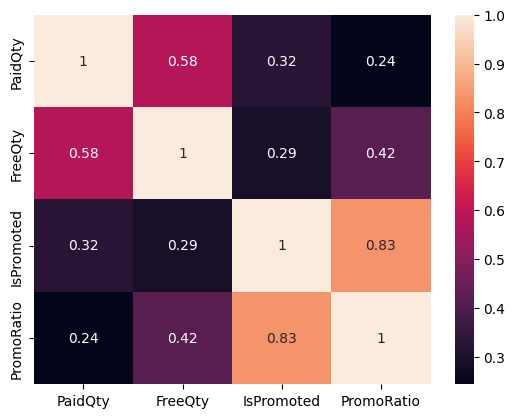

In [15]:
sns.heatmap(corr_matrix_a, annot=True)
plt.show()

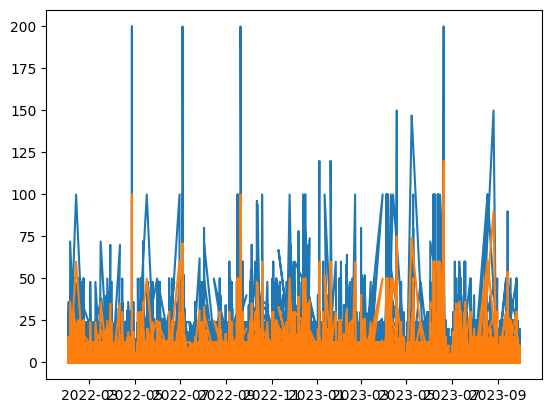

In [22]:
ts_a = df_sales[df_sales["ProductId"]==14]
plt.plot(ts_a["Date"], ts_a["PaidQty"])
plt.plot(ts_a["Date"], ts_a["FreeQty"])

In [5]:
df_promo
# Her promosyon aralığında günlük ortalama satışı buraya sütun olarak ekle
# Col1 = Kaç defa değerlendirilmiş barem
# Col2 = Toplam satış

,MProductId,BeginDate,EndDate,PaidQty,FreeQty
0,14,2022-01-01,2022-01-31 23:30:00,6,2
1,14,2022-01-01,2022-01-31 23:30:00,12,5
2,14,2022-01-01,2022-01-31 23:30:00,24,12
3,14,2022-02-01,2022-02-28 23:30:00,6,2
4,14,2022-02-01,2022-02-28 23:30:00,12,5
...,...,...,...,...,...
1401,148,2023-10-10,2023-10-12 23:30:00,10,1
1402,148,2023-10-10,2023-10-12 23:30:00,10,4
1403,148,2023-10-10,2023-10-12 23:30:00,25,3
1404,148,2023-10-10,2023-10-12 23:30:00,50,10


In [8]:
df_promo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1406 entries, 0 to 1405
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   MProductId  1406 non-null   int64         
 1   BeginDate   1406 non-null   datetime64[ns]
 2   EndDate     1406 non-null   datetime64[ns]
 3   PaidQty     1406 non-null   int64         
 4   FreeQty     1406 non-null   int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 55.1 KB


In [ ]:


df_promo["PromoPeriod"] = df_promo.EndDate - df_promo.BeginDate

mean_sales = (df_sales.PaidQty.mean(), df_sales.FreeQty.mean(), df_sales.PromoRatio.mean())
mean_promo = (df_promo.PaidQty.mean(), df_promo.FreeQty.mean(), df_promo.PromoRatio.mean())
mean_period = df_promo.PromoPeriod.mean()

In [4]:
print("Sales Data Averages")
print("(Paid Quantity, Free Quantity, Promotion Ratio) = ", mean_sales)

Sales Data Averages
(Paid Quantity, Free Quantity, Promotion Ratio) =  (6.0447649633247575, 0.5334650281806032, 0.02775465564209698)


In [5]:
print("Promotion Data Averages")
print("(Paid Quantity, Free Quantity, Promotion Ratio) = ", mean_promo)

Promotion Data Averages
(Paid Quantity, Free Quantity, Promotion Ratio) =  (22.4551920341394, 8.333570412517782, 0.20771934923592666)


In [6]:
print("Average Promotion Period = ", mean_period)

Average Promotion Period =  19 days 11:33:01.792318634


In [7]:
print("Sales Data - Product Count = ", len(set(df_sales.ProductId)))
print("Promotion Data - Product Count = ", len(set(df_promo.MProductId)))

Sales Data - Product Count =  20
Promotion Data - Product Count =  13
